In [98]:
%pylab
!pip install celluloid
!pip install ffmpeg
!pip install termcolor
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import scipy as sp
from scipy import integrate

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


#### 1.2 Presentación de funciones.

In [296]:
def f(x,n):
    f = 2*(((-1)**(n-1))/n)*np.sin(n*x)
    return f

In [297]:
L = np.pi
cicles = 1
x = np.linspace(-L,L*cicles,100)

<IPython.core.display.Javascript object>


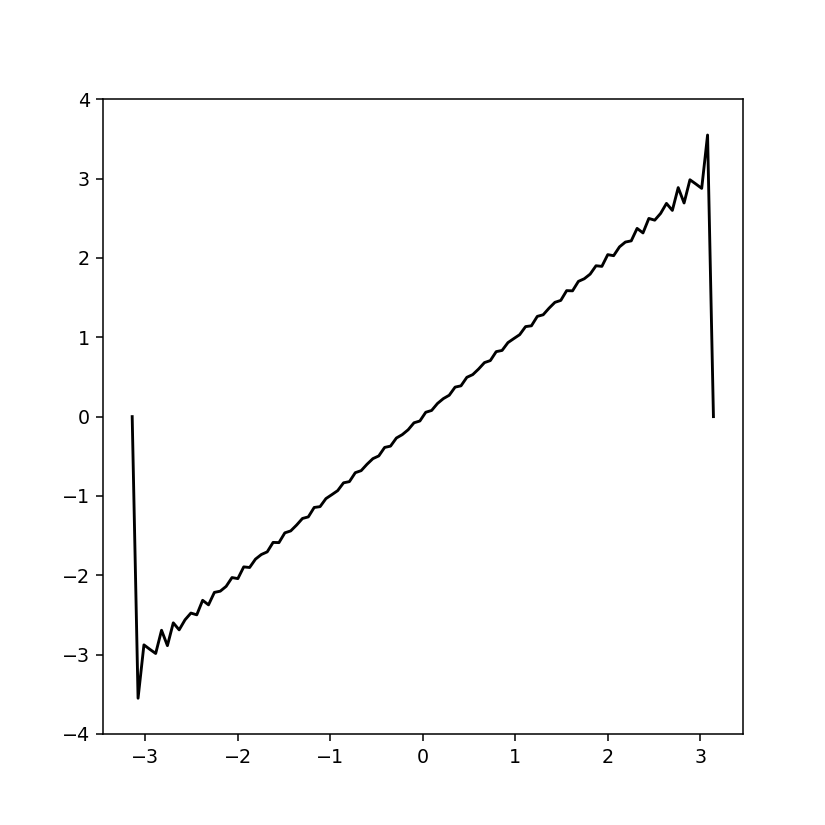

In [298]:
n = 1
nt = 50
F = 0

fig = plt.figure(figsize=(6,6))
camera = Camera(fig)

while n < nt:
    F += f(x,n)
    plt.plot(x,F,c='k')
    camera.snap()
    n += 1

animation = camera.animate()

#### 1.4 Derivad Espectral




<IPython.core.display.Javascript object>


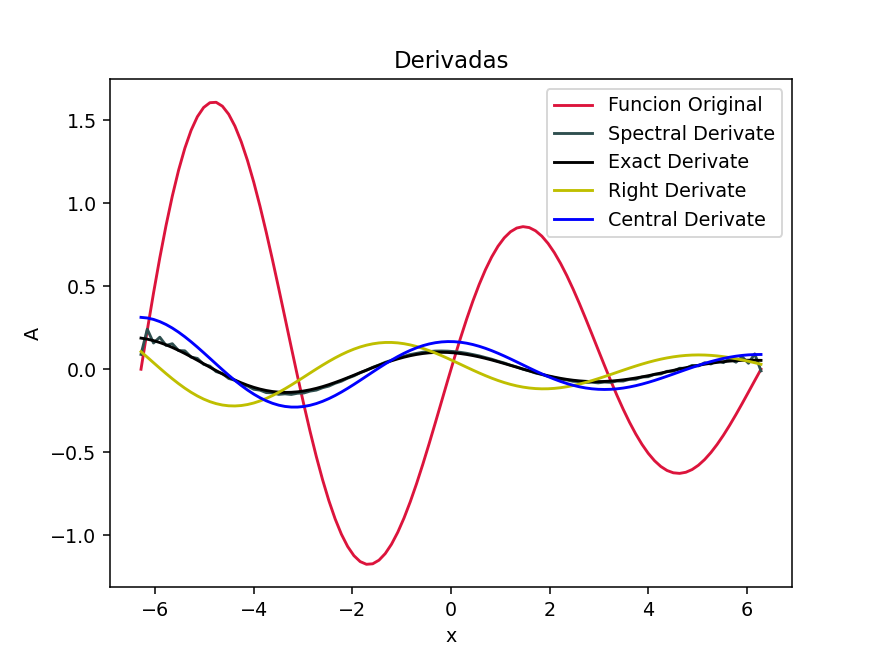

C:\Users\57313\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [344]:
t = np.linspace(-2*np.pi,2*np.pi,100)
h = 100/(4*np.pi)

def f(t):
    f = np.exp(-0.1*t)*np.sin(t)
    return f

def df(t):
    df = -0.1*np.exp(-0.1*t)*np.sin(t) + np.exp(-0.1*t)*np.cos(t)
    return df

def dfCentral(f,t,h):
    d = 0
    if h != 0:
        d = (f(t+h)-f(t-h))/(2*h)
    return d

def dfDerecha(f,t,h):
    d = 0
    if h != 0:
        d = (f(t+h)-f(t))/h
    return d


DF = (df(t))/10
central = dfCentral(f,t,h)
Derecha = dfDerecha(f,t,h)

FFT = np.fft.fft(f(t))
frequecy =np.fft.fftfreq(np.size(t),np.max(DF))
FFT *=1j*frequecy
dfEspectral = np.fft.ifft(FFT)

plt.figure()

plt.title("Derivadas")
plt.xlabel("x")
plt.ylabel("A")

plt.plot(t,f(t),color='crimson',label='Funcion Original')
plt.plot(t,dfEspectral,color='darkslategrey',label='Spectral Derivate')
plt.plot(t,DF,color='k',label='Exact Derivate')
plt.plot(t,Derecha,color='y',label='Right Derivate')
plt.plot(t,central,color='b',label='Central Derivate')
plt.legend()
plt.show()


#### Manchas Solares

In [345]:
!pip install wget

from matplotlib import rc 
import os.path as path
import wget

In [346]:
file = 'Downloads'
url = 'https://raw.githubusercontent.com/asegura4488/DataBase/main/MetodosComputacionales/ManchasSolares.dat'
if not path.exists(url):
    Path_ = wget.download(url)
    print('Descargado')
else:
    Path_ = file

Descargado


<IPython.core.display.Javascript object>


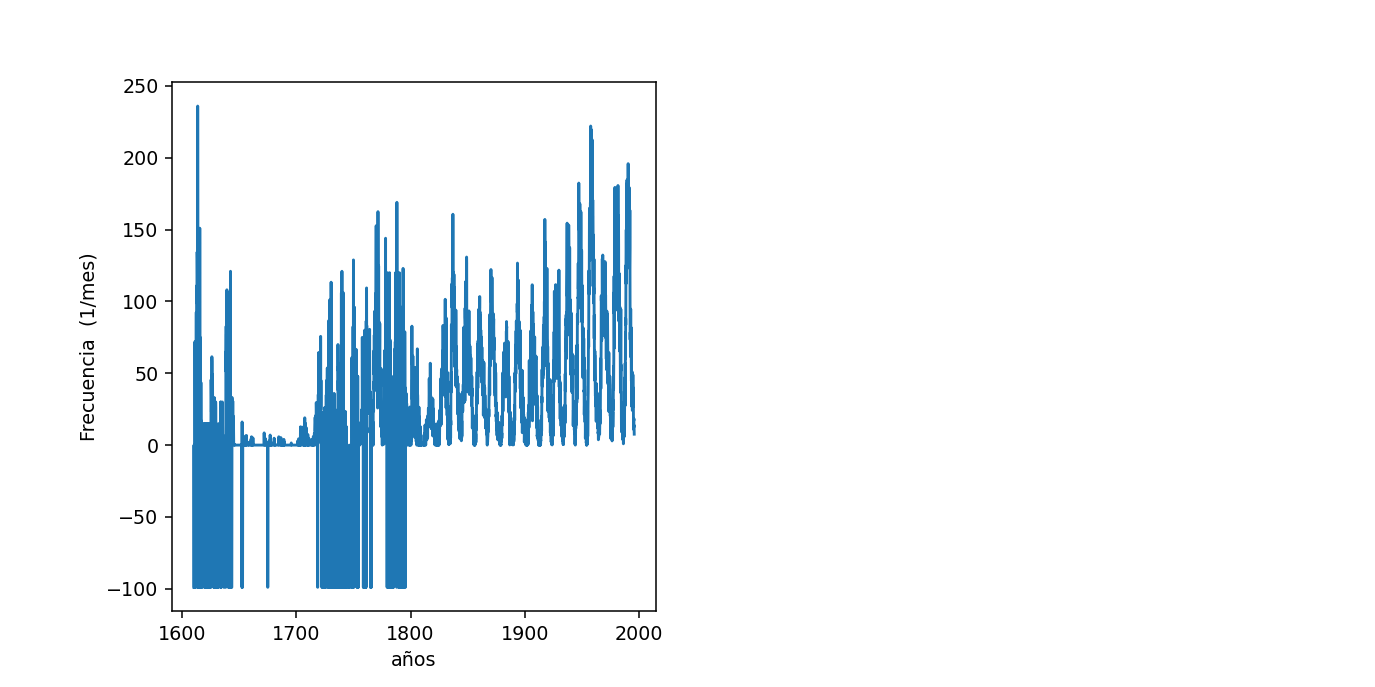

In [350]:
data = np.loadtxt(Path_)

fecha = data[:,0] + data[:,1]/12

manchas = data[:,3]

fig = plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)

plt.xlabel('años')
plt.ylabel("Frecuencia  (1/mes)")

plt.plot(fecha, manchas, label = 'Manchas Solares')

<IPython.core.display.Javascript object>


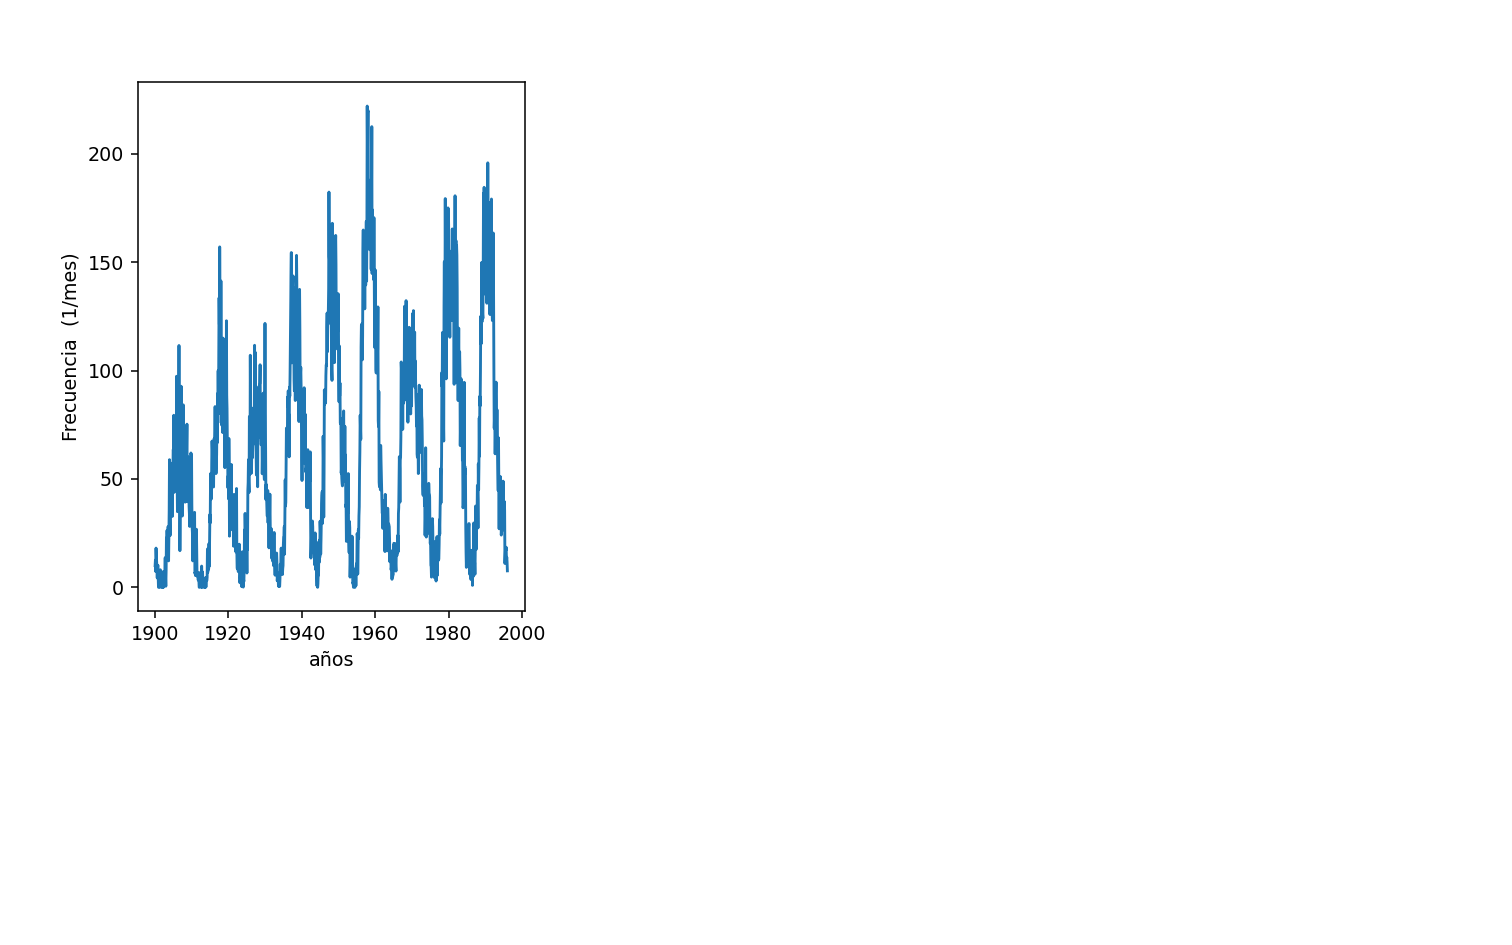

In [351]:
filtro = fecha > 1900

manchas = manchas[filtro]
fecha = fecha[filtro]

fig = plt.figure(figsize = (8, 5))
plt.subplot(1,2,1)

plt.xlabel('años')
plt.ylabel("Frecuencia  (1/mes)")

plt.plot(fecha, manchas, label = 'Manchas Solares')

1152


<IPython.core.display.Javascript object>


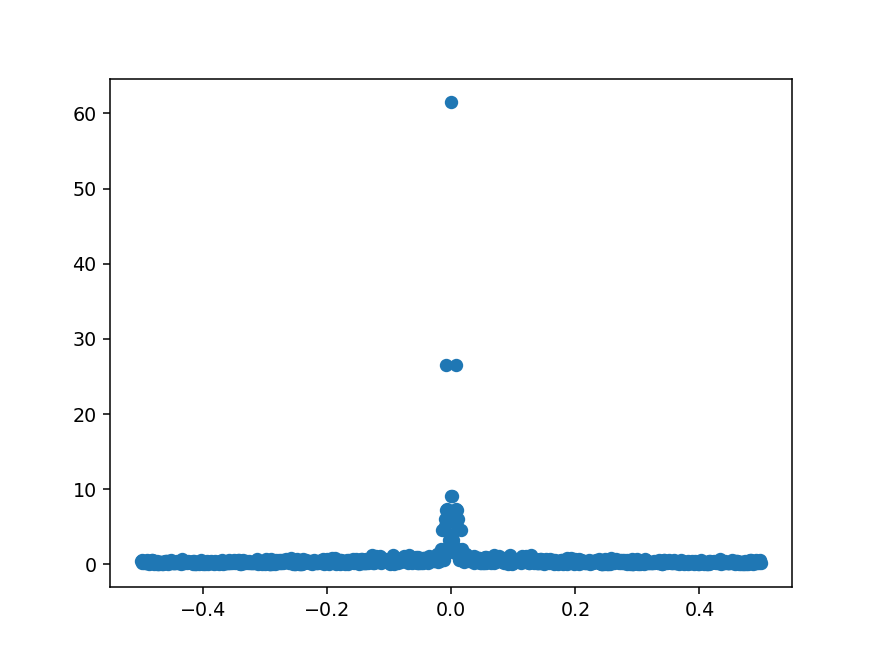

In [352]:
fft = np.fft.fft(manchas)

Npoints = len(manchas)
print(Npoints)

Frecuencias = np.fft.fftfreq(Npoints,1)
#print(Frecuencias)
ffta = np.abs(fft)

plt.scatter(Frecuencias,np.abs(fft/Npoints))

In [353]:
Npoints = len(manchas)

mean = np.mean(manchas)
FrecuenciaM = manchas - mean
fft = np.fft.fft(manchas)
ffff = np.fft.fft(FrecuenciaM)


Frecuencias = np.fft.fftfreq(Npoints,1)
ffta = np.abs(ffff)

<IPython.core.display.Javascript object>


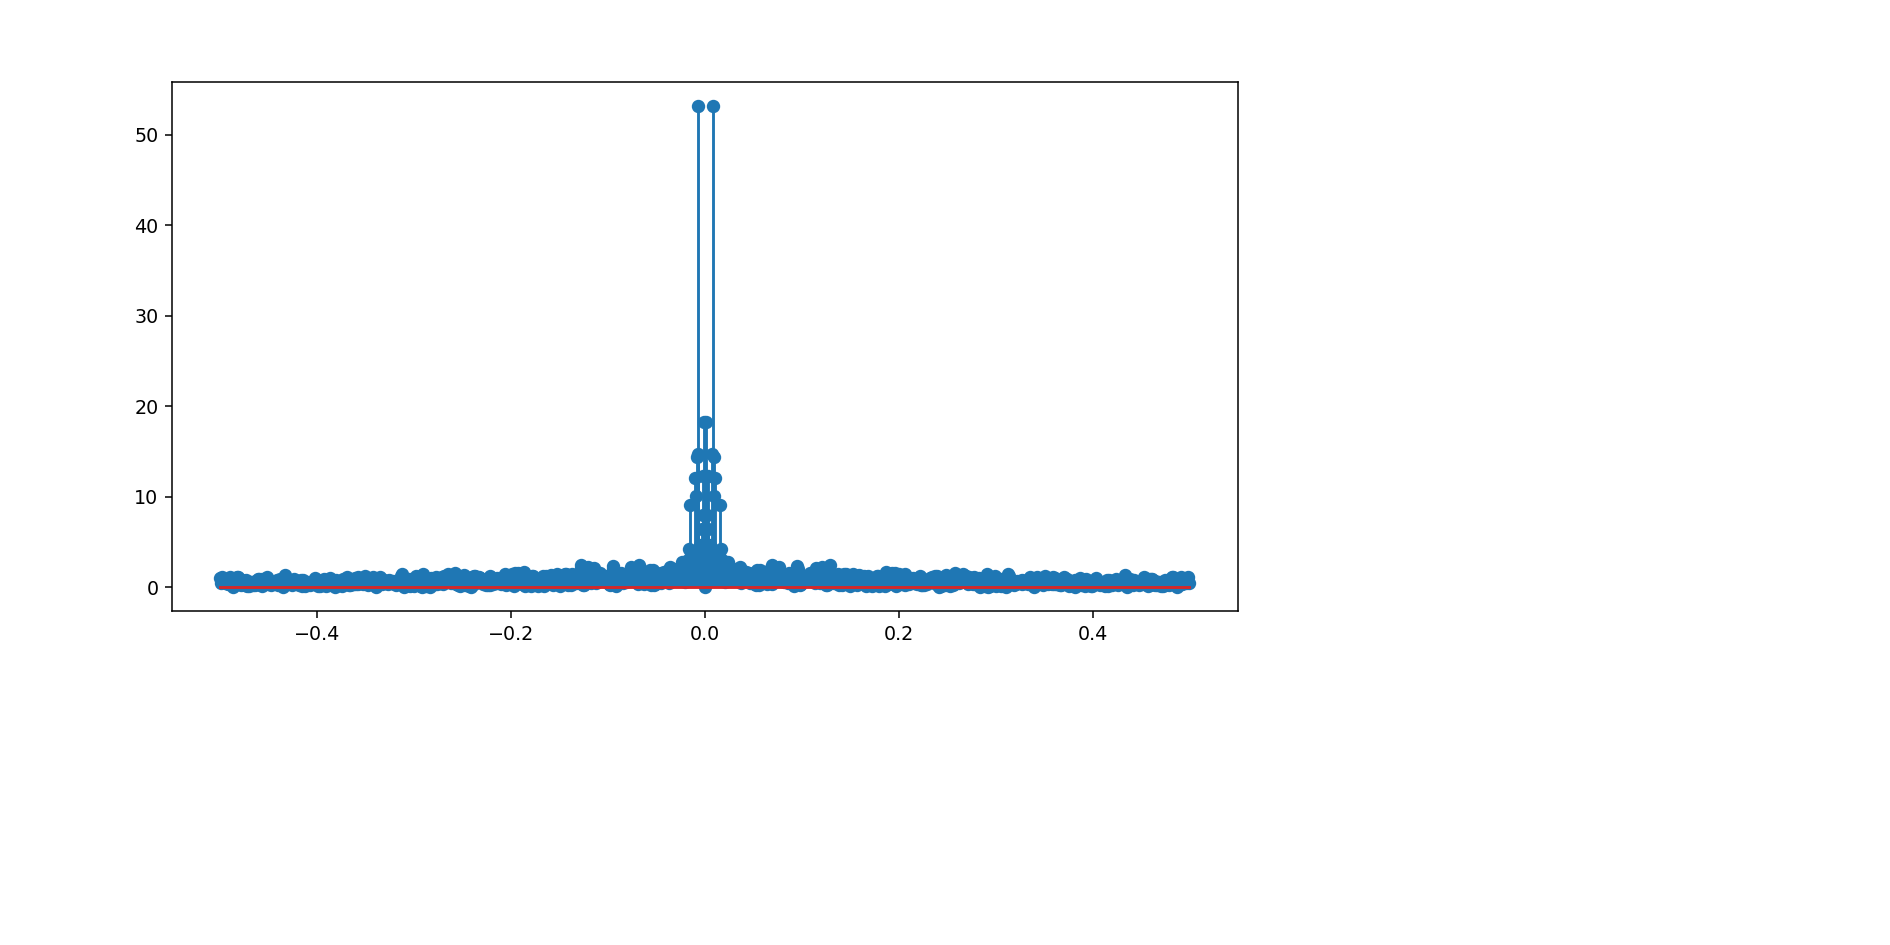

<StemContainer object of 3 artists>

In [354]:
fig = plt.figure(figsize = (10,5))
plt.stem(Frecuencias, 2*ffta/Npoints)

In [355]:
# Segundo Filtro

ii = np.argmax(ffta)
f0 = Frecuencias[ii]
T = (1.0 / f0)/10

ii1 = np.abs(Frecuencias) > f0
ii2 = np.abs(Frecuencias) < f0

<IPython.core.display.Javascript object>


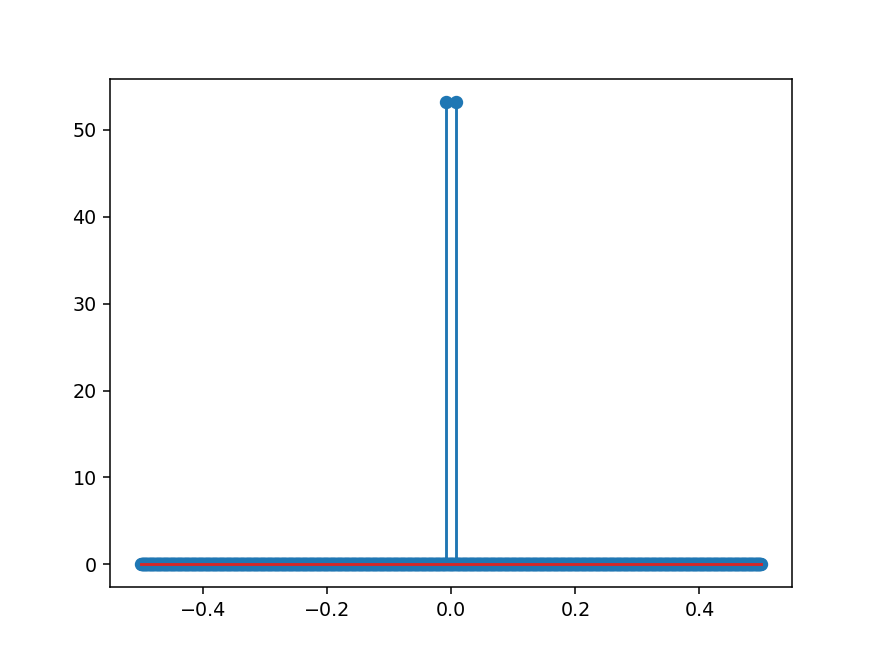

<StemContainer object of 3 artists>

In [356]:
fft[ii1 | ii2] = 0
ffta = np.abs(fft)

plt.stem(Frecuencias, 2*ffta/Npoints)

In [357]:
mancha_fft = np.fft.ifft(fft)

<IPython.core.display.Javascript object>


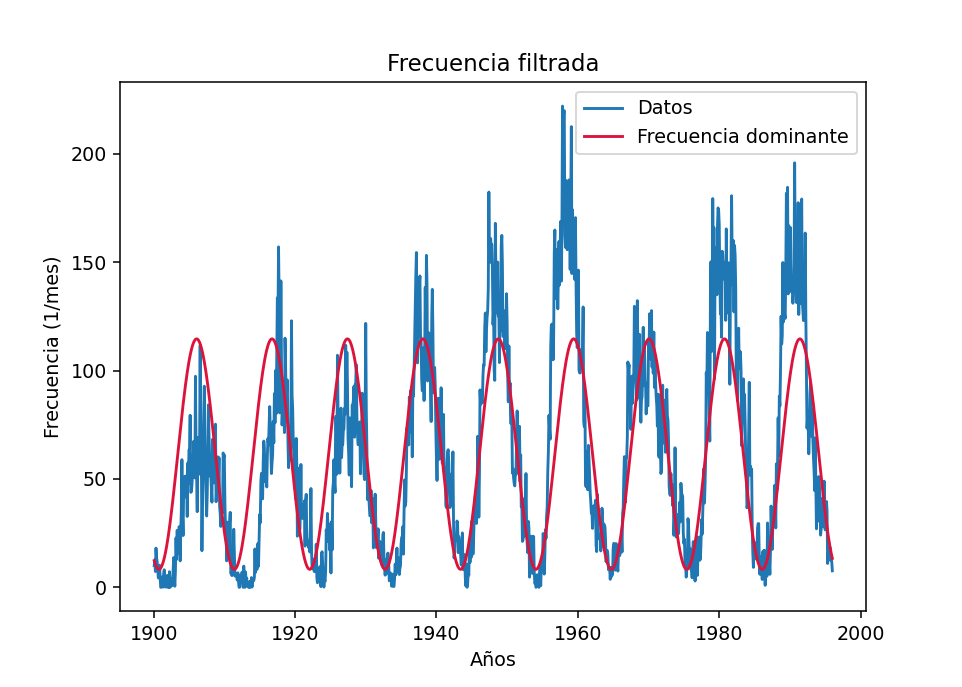

In [358]:
fig = plt.figure(figsize = (7,5))
plt.subplot(1,1,1)
plt.title("Frecuencia filtrada")
plt.plot(fecha, manchas, label = "Datos")
plt.plot(fecha, np.real(mancha_fft)+mean, c = "crimson", label = "Frecuencia dominante")

plt.xlabel("Años")
plt.ylabel("Frecuencia (1/mes)")
plt.legend()